# Import

In [1]:
## our functions
from utils import plot_num_of_classes, split, upsample, ecg2fig, spectrogram
from Models.utils import evaluate_model, confustion_matrix, plot_confusion_matrix

In [2]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from sklearn.utils import resample
from scipy.ndimage import gaussian_filter
import warnings
warnings.filterwarnings("ignore")

/ottomo/anaconda3/envs/tf1py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/ottomo/anaconda3/envs/tf1py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/ottomo/anaconda3/envs/tf1py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/ottomo/anaconda3/envs/tf1py37/lib/python3.7/site-packages

# Data Check and Load

In [3]:
### read one dataset 
## to see how the datasets are made --> RawData_split.py and RawData_split_10secs.py
# here we use the sample size 256 of one data 
data = "../Data/mitbih_train.csv" ## use the data from kaggle
test_data = "../Data/mitbih_test.csv"
# label = "../Data/label_RR_nonempty.csv"
dataset = pd.read_csv(data, header=None)
testset = pd.read_csv(test_data, header=None)

In [4]:
data = pd.concat([dataset, testset])

# Data View

In [5]:
## take a look at the sizes of each class
label = data[187].value_counts()
print(label)
# labelset = labelset.rename(columns={'0':'label'})
# label = labelset['label'].astype(int)
# label = label.value_counts()
# print(label)

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64


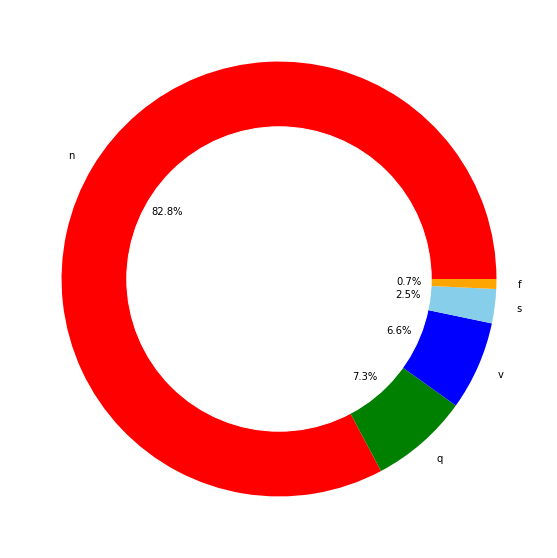

In [6]:
## and we can plot it as a circle 
plot_num_of_classes(label)
## we can see the huge unbalance between the classes

In [7]:
## merge the label to the last column of the dataset 
## just for convenience
# dataset = pd.concat([dataset, labelset['label']], axis=1, sort=False)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split the dataset

In [8]:
# label = dataset['label']
# label = label.to_numpy()
dataset = dataset.to_numpy()
# dataset = dataset[:, 2:]
print(dataset)

[[0.97794116 0.92647058 0.68137252 ... 0.         0.         0.        ]
 [0.96011394 0.86324787 0.46153846 ... 0.         0.         0.        ]
 [1.         0.65945947 0.18648648 ... 0.         0.         0.        ]
 ...
 [0.90612245 0.62448978 0.59591836 ... 0.         0.         4.        ]
 [0.85822785 0.64556962 0.84556961 ... 0.         0.         4.        ]
 [0.90150636 0.84588647 0.80069524 ... 0.         0.         4.        ]]


In [24]:
# use our split function 
(train, train_label), (validation, validation_label), (test, test_label) = split(dataset
                                                                                 ,input_size=187)

number of class : 72471
number of train data per class 72271
72271
number of class : 2223
number of train data per class 2023
2023
number of class : 5788
number of train data per class 5588
5588
number of class : 641
number of train data per class 441
441
number of class : 6431
number of train data per class 6231
6231


#  Upsample

In [25]:
## we can do the upsample to reduce the impact of the unbalance between the classees
## to our dataset
## but only do on the training data
train = upsample(train)

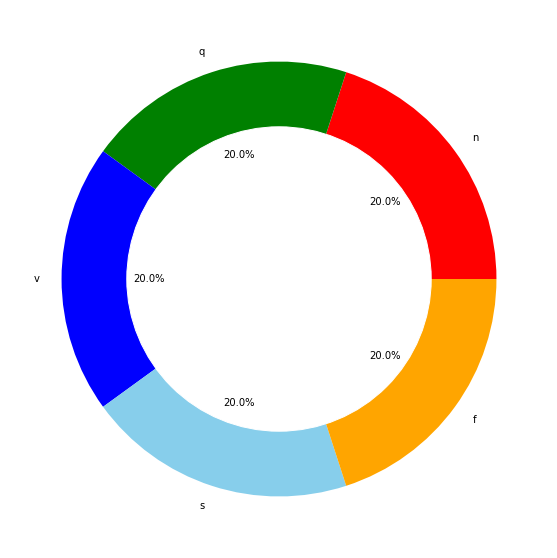

In [26]:
## and we can plot again it as a circle 
equilibre = train[len(train.columns) - 1].value_counts()
plot_num_of_classes(equilibre)

# Transfer to Images

In [27]:
## prepare data and label
train_label = train[len(train.columns) - 1]
train_label = to_categorical(train_label)
validation_label = to_categorical(validation_label)
test_label = to_categorical(test_label)

X_train = train.iloc[:, :len(train.columns)- 1].values
train = X_train.reshape(len(X_train), X_train.shape[1], 1)
validation = validation.reshape(len(validation), validation.shape[1], 1)
test = test.reshape(len(test), test.shape[1], 1)

In [28]:
train = ecg2fig(train)
train_ = train.reshape(train.shape[0], train.shape[1], train.shape[1], 1)
validation = ecg2fig(validation)
validation = validation.reshape(validation.shape[0], validation.shape[1], validation.shape[2], 1)
test = ecg2fig(test)
test = test.reshape(test.shape[0], test.shape[1], test.shape[2], 1)

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

# Plot ECG image

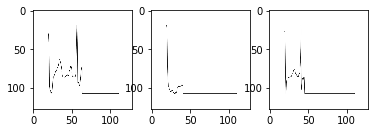

In [16]:
fig = plt.figure()
plt.gray()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(train_[0, :, :, 0])
ax2.imshow(validation[300, :, :, 0])
ax3.imshow(test[100, :, :, 0])
plt.show()

# Training

In [ ]:
## train with images
from Models.model_2d import model_2d
# from Models.spectro_conv1d import network
model, history = model_2d(train_, train_label, validation, validation_label)

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_cnn (InputLayer)         (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 122, 122, 32) 1600        inputs_cnn[0][0]                 
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 122, 122, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 122, 122, 32) 25632       batch_normalization_v1[0][0]     
_____________________________________

782/782 [==============================] - 69s 88ms/step - loss: 0.0988 - acc: 0.9662 - val_loss: 9.1720 - val_acc: 0.2020
Epoch 4/25
16/16 [==============================] - 0s 18ms/step - loss: 1.4911 - acc: 0.5540

Epoch 00004: saving model to /home/datafile/Wesley_in_Germany/ecgClassificationwithCNN/Models/trained_models/twod_weights.h5
782/782 [==============================] - 69s 89ms/step - loss: 0.0743 - acc: 0.9744 - val_loss: 1.4911 - val_acc: 0.5540
Epoch 5/25
16/16 [==============================] - 0s 15ms/step - loss: 2.7849 - acc: 0.4500

Epoch 00005: saving model to /home/datafile/Wesley_in_Germany/ecgClassificationwithCNN/Models/trained_models/twod_weights.h5
782/782 [==============================] - 69s 88ms/step - loss: 0.0583 - acc: 0.9805 - val_loss: 2.7849 - val_acc: 0.4500
Epoch 6/25
16/16 [==============================] - 0s 17ms/step - loss: 2.4946 - acc: 0.5000

Epoch 00006: saving model to /home/datafile/Wesley_in_Germany/ecgClassificationwithCNN/Models/tr

Accuracy: 20.00%


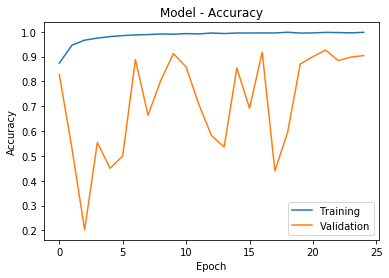

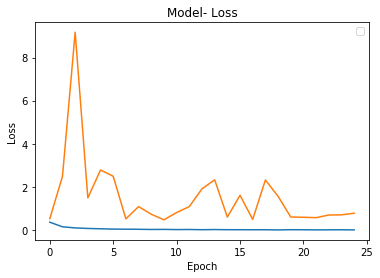

Normalized confusion matrix


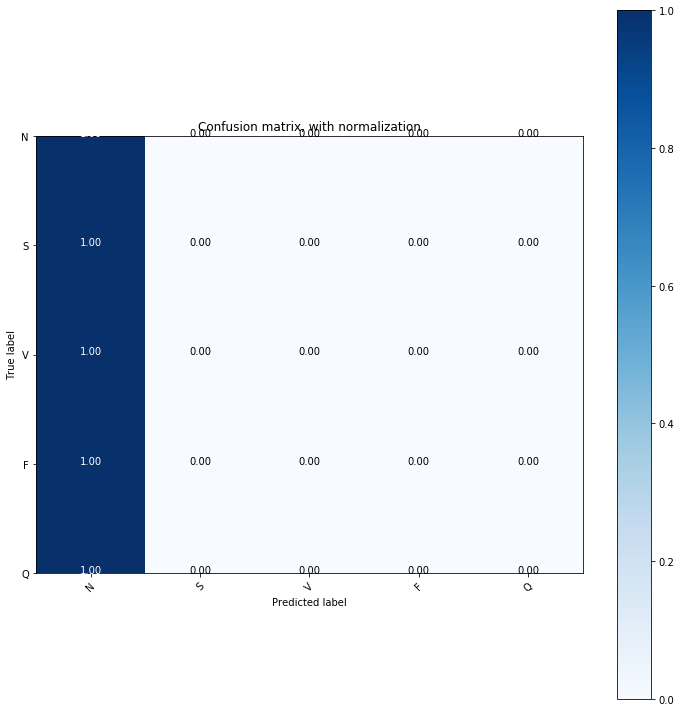

In [21]:
evaluate_model(history, validation, validation_label, model)
validation_pred = model.predict(validation)
# print("the prediction on the validation data", validation_pred_hiker)

cnf_matrix = confusion_matrix(validation_label.argmax(axis=1), validation_pred.argmax(axis=1))

plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')

In [22]:
#evaluate on test set
score = model.evaluate(test, test_label)
print('loss, acc', score)

500/500 [==============================] - 0s 469us/sample - loss: 12.8945 - acc: 0.2000
loss, acc [12.894476341247563, 0.2]
